<a href="https://colab.research.google.com/github/41y08h/colab-notebooks/blob/main/TF_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

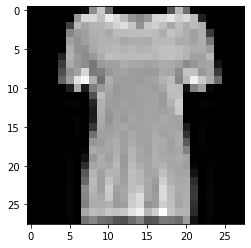

In [5]:
plt.imshow(x_train[10], cmap="gray");

In [6]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
K = len(np.unique(y_train))
K

10

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten

model = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, (3, 3), strides=2, activation="relu"),
    Conv2D(64, (3, 3), strides=2, activation="relu"),
    Conv2D(128, (3, 3), strides=2, activation="relu"),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(K, activation="softmax")    
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5288 - accuracy: 0.8176 - val_loss: 0.4191 - val_accuracy: 0.8445
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3645 - accuracy: 0.8627 - val_loss: 0.4156 - val_accuracy: 0.8456
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3280 - accuracy: 0.8771 - val_loss: 0.3914 - val_accuracy: 0.8635
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3006 - accuracy: 0.8860 - val_loss: 0.3571 - val_accuracy: 0.8695
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2713 - accuracy: 0.8975 - val_loss: 0.3890 - val_accuracy: 0.8599
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2577 - accuracy: 0.9030 - val_loss: 0.3737 - val_accuracy: 0.8728
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2353 - accuracy: 0.9108 - val_loss: 0.3834 - val_accuracy

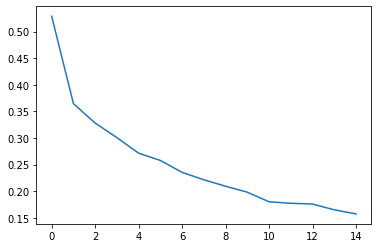

In [11]:
plt.plot(r.history['loss'], label="loss")

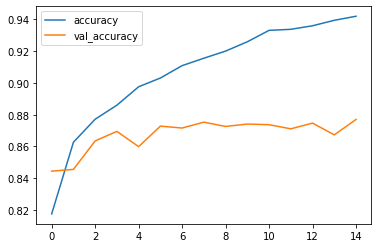

In [12]:
plt.plot(r.history['accuracy'], label="accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")

plt.legend();

In [22]:
y_pred = model.predict(x_test)
y_true = y_test

313/313 [==============================] - 1s 2ms/step


In [23]:
# Convert one hot to sparse
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

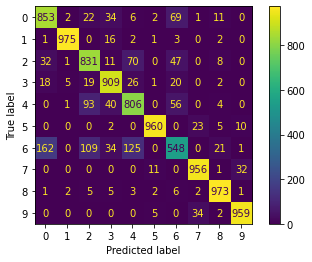

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred);